In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [14]:
#Reading data without outliers
df = pd.read_csv('credit_data_process-2.csv')
df.head()

,Unnamed: 0,Month,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score,Age,Annual_Income,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Months
0,1,2,12,128,1,1,4,0,23.0,19114.12,...,0.0,31.033317,11.270000,4.0,809.98,31.944960,49.574949,118.280222,284.629163,220.840847
1,2,6,12,128,1,1,5,0,0.0,19114.12,...,3.0,7.000000,10.389016,4.0,809.98,28.609352,49.574949,81.699521,331.209863,267.000000
2,3,0,12,128,1,1,6,0,23.0,19114.12,...,5.0,4.000000,6.270000,4.0,809.98,31.377862,49.574949,199.458074,223.451310,268.000000
3,4,7,12,128,1,1,2,0,23.0,19114.12,...,6.0,31.033317,11.270000,4.0,809.98,24.797347,49.574949,41.420153,341.489231,269.000000
4,5,5,12,128,1,1,0,0,23.0,19114.12,...,8.0,4.000000,9.270000,4.0,809.98,27.262259,49.574949,62.430172,340.479212,270.000000


In [15]:
df = df.drop(['Unnamed: 0'],axis=1)

In [16]:
corr_matrix = np.round(df.corr(), 2)
corr_matrix

,Month,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score,Age,Annual_Income,Monthly_Inhand_Salary,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Months
Month,1.0,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00
Occupation,-0.0,1.00,-0.01,0.00,-0.01,0.00,0.01,-0.01,-0.00,0.00,...,0.00,-0.01,-0.00,0.00,0.01,0.00,-0.01,0.00,-0.00,-0.00
Type_of_Loan,-0.0,-0.01,1.00,0.01,-0.01,-0.01,-0.01,0.01,0.02,0.02,...,-0.02,-0.02,-0.02,-0.01,-0.02,0.00,-0.01,0.02,0.02,0.02
Credit_Mix,0.0,0.00,0.01,1.00,-0.01,-0.02,0.14,0.04,0.05,0.06,...,-0.26,-0.11,-0.05,-0.20,-0.37,0.02,-0.09,0.04,0.11,0.21
Payment_of_Min_Amount,-0.0,-0.01,-0.01,-0.01,1.00,0.05,0.18,-0.14,-0.18,-0.17,...,0.32,0.25,0.31,0.36,0.31,-0.05,0.06,-0.12,-0.21,-0.35
Payment_Behaviour,0.0,0.00,-0.01,-0.02,0.05,1.00,0.02,-0.03,-0.24,-0.24,...,0.07,0.05,0.05,0.08,0.08,-0.11,-0.14,0.22,-0.47,-0.07
Credit_Score,0.0,0.01,-0.01,0.14,0.18,0.02,1.00,-0.05,-0.07,-0.06,...,0.10,0.14,0.19,0.06,0.04,-0.01,-0.03,-0.05,-0.05,-0.10
Age,0.0,-0.01,0.01,0.04,-0.14,-0.03,-0.05,1.00,0.08,0.07,...,-0.15,-0.10,-0.13,-0.19,-0.18,0.02,-0.05,0.05,0.11,0.19
Annual_Income,0.0,-0.00,0.02,0.05,-0.18,-0.24,-0.07,0.08,1.00,0.84,...,-0.23,-0.18,-0.16,-0.24,-0.25,0.16,0.41,0.58,0.61,0.24
Monthly_Inhand_Salary,0.0,0.00,0.02,0.06,-0.17,-0.24,-0.06,0.07,0.84,1.00,...,-0.23,-0.17,-0.16,-0.23,-0.25,0.15,0.40,0.58,0.61,0.24


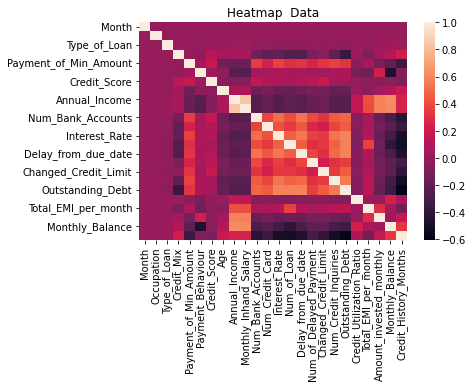

In [18]:
ax = sns.heatmap(df.corr())
plt.title("Heatmap  Data")
plt.show()

# Feature selection on Information gain and mutual information

In [4]:
X = df.drop(['Credit_Score'],axis=1)
y = df['Credit_Score']

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
scalar = MinMaxScaler()
model = scalar.fit(X)
scaled_X = model.transform(X)
scaled_X


array([[0.28571429, 0.8       , 0.02045055, ..., 0.24395184, 0.37312784,
        0.54663576],
       [0.85714286, 0.8       , 0.02045055, ..., 0.16850449, 0.43419337,
        0.66089109],
       [0.        , 0.8       , 0.02045055, ..., 0.4113804 , 0.292926  ,
        0.66336634],
       ...,
       [0.71428571, 0.6       , 0.10912286, ..., 0.04955851, 0.6775069 ,
        0.94059406],
       [0.57142857, 0.6       , 0.10912286, ..., 0.51907233, 0.41840299,
        0.94306931],
       [0.14285714, 0.6       , 0.10912286, ..., 0.3447739 , 0.51608108,
        0.94554455]])

In [7]:
from sklearn.model_selection import train_test_split
#splitting data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(scaled_X,y, test_size=0.25,random_state=42)


In [8]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.        , 0.00143196, 0.32736927, 0.15015481, 0.11005811,
       0.00657393, 0.02281089, 0.52269132, 0.45087683, 0.10483386,
       0.11084101, 0.16976388, 0.08013998, 0.12096516, 0.07900959,
       0.09549869, 0.11107848, 0.56219875, 0.        , 0.49303571,
       0.02897603, 0.02875493, 0.09145897])

In [9]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

Outstanding_Debt            0.562199
Annual_Income               0.522691
Total_EMI_per_month         0.493036
Monthly_Inhand_Salary       0.450877
Type_of_Loan                0.327369
Interest_Rate               0.169764
Credit_Mix                  0.150155
Delay_from_due_date         0.120965
Num_Credit_Inquiries        0.111078
Num_Credit_Card             0.110841
Payment_of_Min_Amount       0.110058
Num_Bank_Accounts           0.104834
Changed_Credit_Limit        0.095499
Credit_History_Months       0.091459
Num_of_Loan                 0.080140
Num_of_Delayed_Payment      0.079010
Amount_invested_monthly     0.028976
Monthly_Balance             0.028755
Age                         0.022811
Payment_Behaviour           0.006574
Occupation                  0.001432
Credit_Utilization_Ratio    0.000000
Month                       0.000000
dtype: float64

<AxesSubplot:>

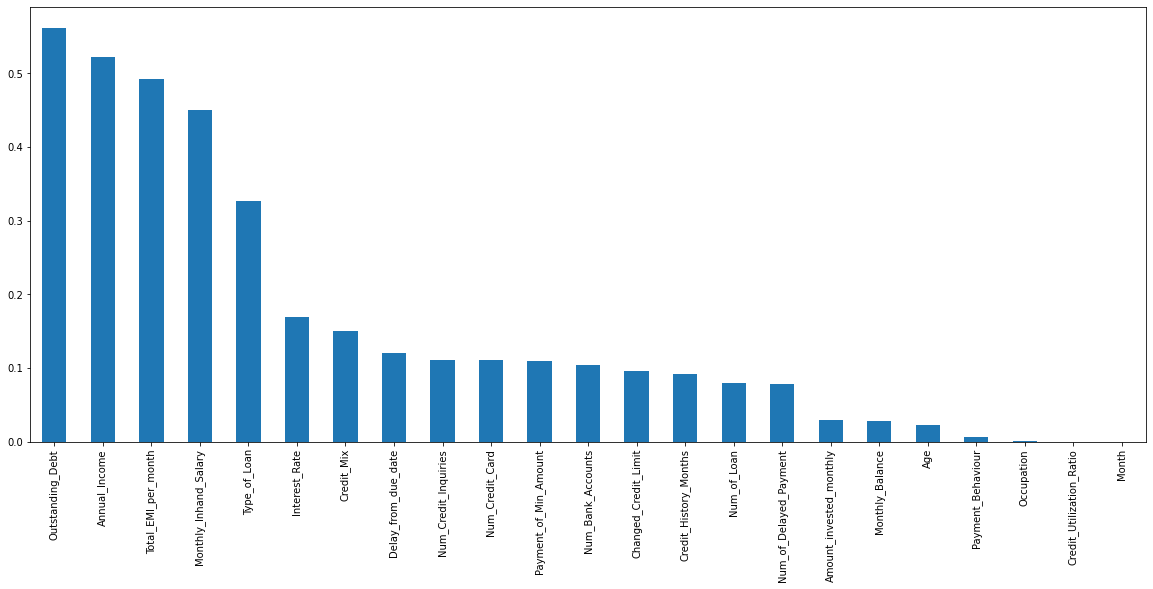

In [10]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))


In [11]:
from sklearn.feature_selection import SelectKBest

In [12]:
#Now we Will select the  top 10 important features
sel_ten_cols = SelectKBest(mutual_info_classif, k=10)
sel_ten_cols.fit(X_train, y_train)
X.columns[sel_ten_cols.get_support()]

Index(['Type_of_Loan', 'Credit_Mix', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month'],
      dtype='object')

# principle component analysis

In [ ]:
from sklearn.decomposition import PCA

In [30]:
#95% of variance in the data
pca=PCA(n_components=0.95)

In [31]:
pca.fit(scaled_X)
x_pca=pca.transform(scaled_X)

In [32]:
x_pca.shape

(99999, 19)

In [33]:
x_pca

array([[-0.13636312, -0.37093436,  0.04167753, ..., -0.06640175,
         0.0429675 ,  0.05698187],
       [-0.22632496, -0.46338156,  0.15188724, ..., -0.22586778,
        -0.04101817,  0.09055519],
       [-0.27329821, -0.47889586,  0.42273701, ..., -0.085814  ,
        -0.01602897,  0.08418964],
       ...,
       [-0.14231839, -0.12999056, -0.55363997, ..., -0.10884119,
        -0.19998998,  0.06250602],
       [-0.25976033, -0.24689522,  0.16934297, ..., -0.08166282,
         0.10391209,  0.17172269],
       [-0.45929147, -0.13905353, -0.47838559, ..., -0.08263991,
         0.08185984,  0.14362845]])

In [34]:
df_1 = pd.DataFrame(x_pca)

In [35]:
df_1.columns

RangeIndex(start=0, stop=19, step=1)

In [36]:
#Adding Credit_score column
df_1['Credit_Score'] = df['Credit_Score']

In [37]:
df_1.columns

Index([             0,              1,              2,              3,
                    4,              5,              6,              7,
                    8,              9,             10,             11,
                   12,             13,             14,             15,
                   16,             17,             18, 'Credit_Score'],
      dtype='object')

In [38]:
df_1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Credit_Score
0,-0.136363,-0.370934,0.041678,0.263842,-0.222105,0.292258,0.251458,-0.438477,-0.190560,-0.044814,0.547227,-0.097278,-0.341116,-0.124602,-0.107184,-0.040613,-0.066402,0.042967,0.056982,0
1,-0.226325,-0.463382,0.151887,0.296798,0.345578,0.304052,0.211837,-0.472029,-0.316839,-0.249155,-0.020493,-0.073904,-0.188365,-0.469507,0.041760,-0.076142,-0.225868,-0.041018,0.090555,0
2,-0.273298,-0.478896,0.422737,0.295270,-0.517704,0.286965,0.194752,-0.482383,-0.322554,-0.146011,-0.117989,0.019139,-0.105781,-0.162512,-0.098846,-0.021087,-0.085814,-0.016029,0.084190,0
3,-0.126936,-0.375277,-0.303028,0.312867,0.500363,0.306469,0.272134,-0.428103,-0.231405,0.044185,0.576941,0.048185,-0.210290,-0.179118,0.028326,-0.181783,-0.088332,0.009019,0.133855,0
4,-0.337219,-0.249693,-0.537153,0.358871,0.219459,0.308859,0.244402,-0.453667,-0.368670,-0.173885,-0.019088,0.321884,-0.029550,-0.192756,-0.054961,-0.077647,-0.081890,-0.034598,0.105237,0


In [40]:
#saving data to a file
df_1.to_csv('C:\\Users\\Student\\Desktop\\INDE_project\\Credit_data_PCA.csv')